In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-12-28 20:27:33--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  23.6MB/s    in 7.1s    

2022-12-28 20:27:41 (20.2 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [4]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [5]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse21-3.png', 'horse04-7.png', 'horse43-9.png', 'horse19-8.png', 'horse18-2.png', 'horse27-1.png', 'horse17-0.png', 'horse30-8.png', 'horse10-9.png', 'horse48-7.png']
['human04-06.png', 'human01-16.png', 'human16-13.png', 'human03-18.png', 'human12-24.png', 'human13-05.png', 'human02-19.png', 'human17-01.png', 'human11-03.png', 'human11-19.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

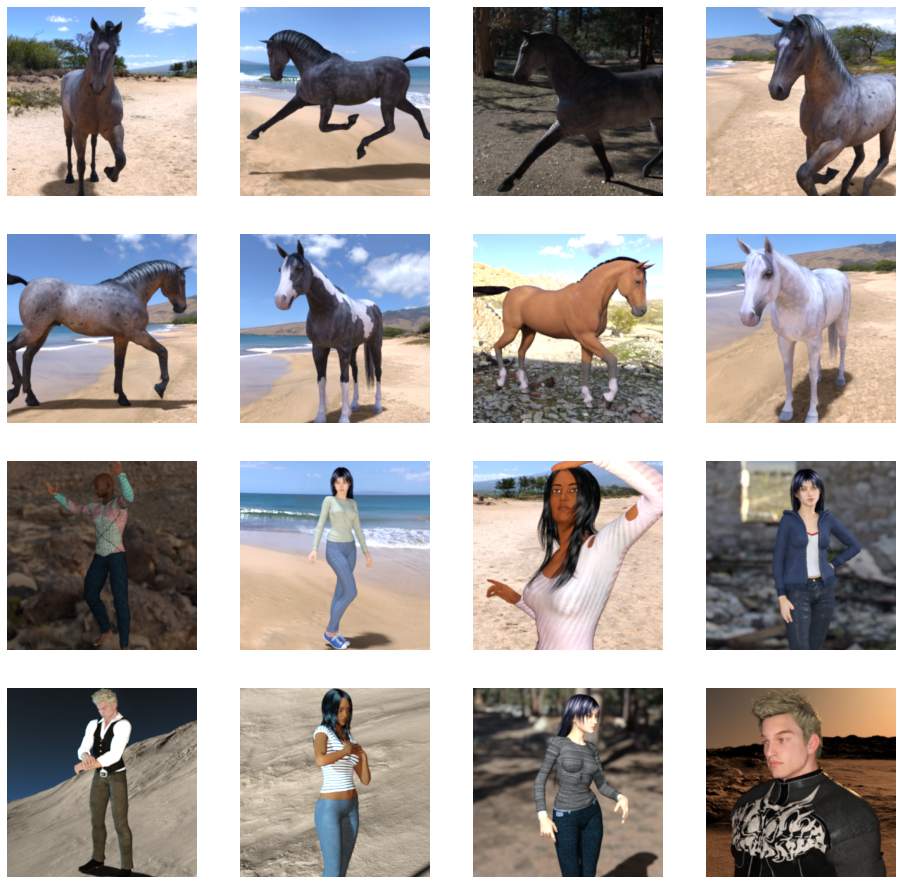

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 17s 702ms/step - loss: 1.0260 - accuracy: 0.5072
Epoch 2/15
8/8 [==============================] - 6s 749ms/step - loss: 0.6594 - accuracy: 0.6185
Epoch 3/15
8/8 [==============================] - 6s 747ms/step - loss: 1.7130 - accuracy: 0.6785
Epoch 4/15
8/8 [==============================] - 6s 865ms/step - loss: 0.3039 - accuracy: 0.8899
Epoch 5/15
8/8 [==============================] - 6s 728ms/step - loss: 0.2010 - accuracy: 0.9188
Epoch 6/15
8/8 [==============================] - 6s 736ms/step - loss: 0.2178 - accuracy: 0.9188
Epoch 7/15
8/8 [==============================] - 6s 744ms/step - loss: 0.1850 - accuracy: 0.9210
Epoch 8/15
8/8 [==============================] - 7s 892ms/step - loss: 0.1413 - accuracy: 0.9453
Epoch 9/15
8/8 [==============================] - 6s 736ms/step - loss: 0.2998 - accuracy: 0.9055
Epoch 10/15
8/8 [==============================] - 7s 803ms/step - loss: 0.1068 - accuracy: 0.9544
Epoch 11/15
8/8 [=

1/1 [==============================] - 0s 270ms/step


<ipython-input-16-c6e0f816273d>:33: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


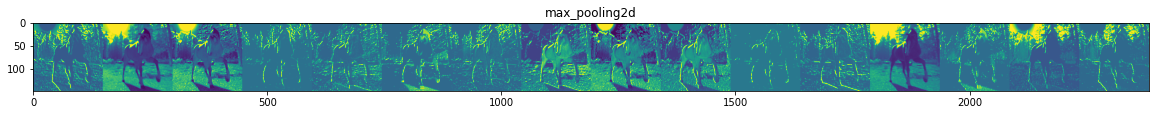

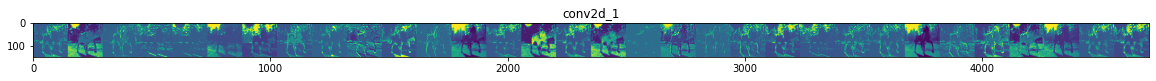

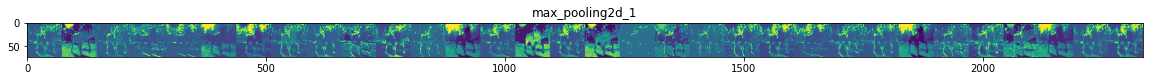

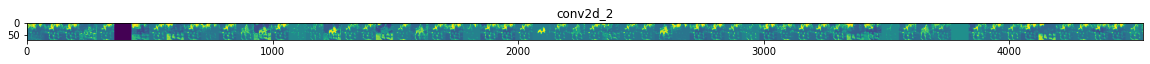

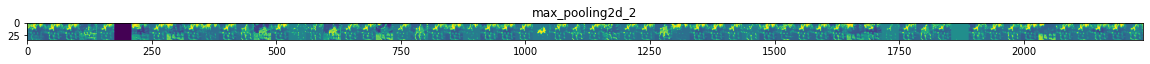

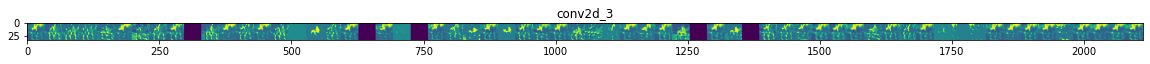

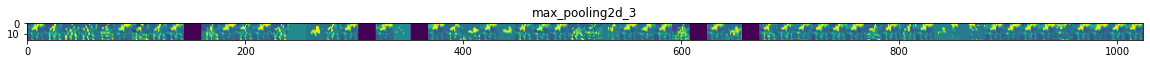

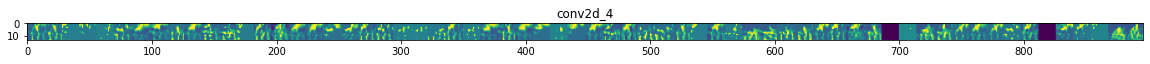

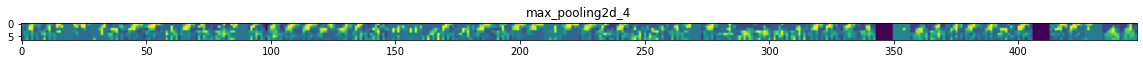

In [16]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]

    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')